In [2]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
import os
os.getcwd()
# place the files in your IDE working dicrectory .
labels = pd.read_csv('aerialcactus/train.csv')
submission = pd.read_csv('aerialcactus/sample_submission.csv')

train_path = 'aerialcactus/train/train/'
test_path = 'aerialcactus/test/test/'

In [5]:
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [6]:
labels.tail()

,id,has_cactus
17495,ffede47a74e47a5930f81c0b6896479e.jpg,0
17496,ffef6382a50d23251d4bc05519c91037.jpg,1
17497,fff059ecc91b30be5745e8b81111dc7b.jpg,1
17498,fff43acb3b7a23edcc4ae937be2b7522.jpg,0
17499,fffd9e9b990eba07c836745d8aef1a3a.jpg,1


In [7]:
labels['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

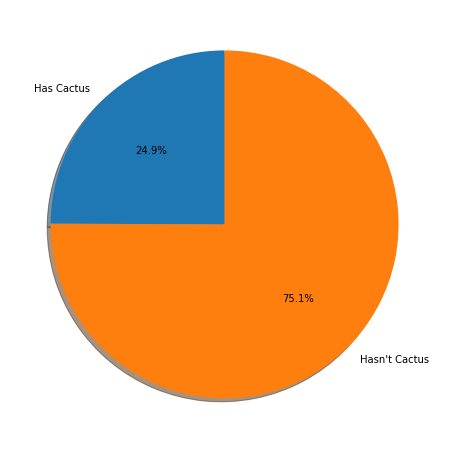

In [8]:
label = 'Has Cactus', 'Hasn\'t Cactus'
plt.figure(figsize = (8,8))
plt.pie(labels.groupby('has_cactus').size(), labels = label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

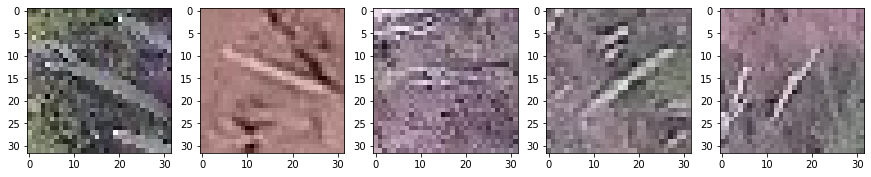

In [9]:
import matplotlib.image as img
#nrows
#ncount = кол-во изображений
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(labels[labels['has_cactus'] == 1]['id'][-5:]):
    path = os.path.join(train_path,idx)
    ax[i].imshow(img.imread(path))

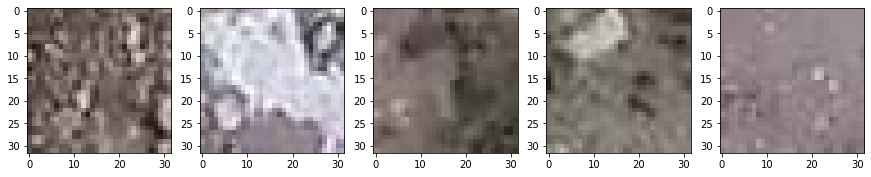

In [10]:
fig,ax = plt.subplots(1,5,figsize = (15,3))
for i,idx in enumerate(labels[labels['has_cactus'] == 0]['id'][:5]):
    path = os.path.join(train_path,idx)
    ax[i].imshow(img.imread(path))

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [12]:
class CactiDataset(Dataset):
    def __init__(self, data, path , transform = None):
        super().__init__()
        self.data = data.values
        self.path = path
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        img_name,label = self.data[index]
        img_path = os.path.join(self.path, img_name)
        image = img.imread(img_path)
        if self.transform is not None:
            image = self.transform(image)
        return image, label

In [13]:
train, valid = train_test_split(labels, stratify=labels.has_cactus, test_size=0.2)

In [14]:
train_transform = transforms.Compose([transforms.ToPILImage(),
                                      transforms.ToTensor()])

test_transform = transforms.Compose([transforms.ToPILImage(),
                                      transforms.ToTensor()])

valid_transform = transforms.Compose([transforms.ToPILImage(),
                                      transforms.ToTensor()])

In [15]:
train_data = CactiDataset(train, train_path, train_transform )
valid_data = CactiDataset(valid, train_path, valid_transform )
test_data = CactiDataset(submission, test_path, test_transform )

In [16]:
batch_size = 16
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=False, num_workers=0)
valid_loader = DataLoader(dataset = valid_data, batch_size = batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle=False, num_workers=0)

training images
torch.Size([3, 32, 32])


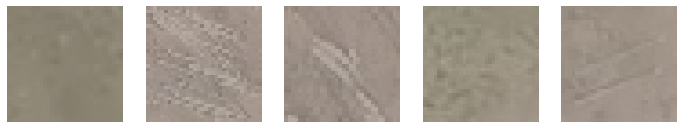

In [17]:
trainimages, trainlabels = next(iter(train_loader))

fig, axes = plt.subplots(figsize=(12, 12), ncols=5)
print('training images')
for i in range(5):
    axe1 = axes[i] 
    imshow(trainimages[i], ax=axe1)

print(trainimages[0].size())


In [18]:
trainimages, trainlabels = next(iter(train_loader))
trainimages
# we see that images are already normalized (in interval from 0 to 1)

tensor([[[[0.2078, 0.2157, 0.2157,  ..., 0.4353, 0.4118, 0.2471],
          [0.1961, 0.2157, 0.2314,  ..., 0.3451, 0.4196, 0.3608],
          [0.2039, 0.2196, 0.2196,  ..., 0.2980, 0.3725, 0.3686],
          ...,
          [0.3020, 0.2235, 0.2118,  ..., 0.2784, 0.2902, 0.3020],
          [0.2314, 0.2353, 0.2784,  ..., 0.2784, 0.2863, 0.2980],
          [0.2706, 0.3255, 0.3647,  ..., 0.2824, 0.2941, 0.3020]],

         [[0.2196, 0.2275, 0.2275,  ..., 0.4471, 0.4235, 0.2588],
          [0.2078, 0.2275, 0.2431,  ..., 0.3569, 0.4314, 0.3725],
          [0.2157, 0.2314, 0.2314,  ..., 0.3098, 0.3843, 0.3804],
          ...,
          [0.2980, 0.2196, 0.2078,  ..., 0.2902, 0.3020, 0.3137],
          [0.2275, 0.2314, 0.2745,  ..., 0.2902, 0.2980, 0.3098],
          [0.2588, 0.3137, 0.3529,  ..., 0.2941, 0.3059, 0.3137]],

         [[0.1451, 0.1529, 0.1529,  ..., 0.3804, 0.3569, 0.1922],
          [0.1333, 0.1529, 0.1686,  ..., 0.2902, 0.3647, 0.3059],
          [0.1412, 0.1569, 0.1569,  ..., 0

In [19]:
# Hyper parameters

num_epochs = 35
num_classes = 2
batch_size = 25
learning_rate = 0.001

In [20]:
# CPU or GPU

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [21]:
epochs = 35
batch_size = 25
learning_rate = 0.001
num_epochs = 10

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module): 
    def __init__(self):
        super(CNN, self).__init__()
        # 1 свёрточный слой: 3 входных канала, 10 выходных
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3)
        # 2 свёрточный слой: 10 входных, 20 выходных каналов
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        # 720 входных нейронов, 1024 выходных
        self.fc1 = nn.Linear(720, 1024)
        # 1024 входных, 2 выходных
        self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [23]:
model = CNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [24]:
# Hyper parameters

num_epochs = 10
num_classes = 2
batch_size = 25
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [25]:
%%time
# keeping-track-of-losses 
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):
    # keep-track-of-training-and-validation-loss
    train_loss = 0.0
    valid_loss = 0.0
    
    # training-the-model
    model.train()
    for data, target in train_loader:
        # move-tensors-to-GPU 
        data = data.to(device)
        target = target.to(device)
        
        # clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        output = model(data)
        # calculate-the-batch-loss
        loss = criterion(output, target)
        # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
        # perform-a-ingle-optimization-step (parameter-update)
        optimizer.step()
        # update-training-loss
        train_loss += loss.item() * data.size(0)
        
    # validate-the-model
    model.eval()
    for data, target in valid_loader:
        
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        
        loss = criterion(output, target)
        
        # update-average-validation-loss 
        valid_loss += loss.item() * data.size(0)
    
    # calculate-average-losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
        
    # print-training/validation-statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

Epoch: 1 	Training Loss: 0.249500 	Validation Loss: 0.157607
Epoch: 2 	Training Loss: 0.164521 	Validation Loss: 0.145304
Epoch: 3 	Training Loss: 0.141151 	Validation Loss: 0.112151
Epoch: 4 	Training Loss: 0.132540 	Validation Loss: 0.108626
Epoch: 5 	Training Loss: 0.119278 	Validation Loss: 0.086007
Epoch: 6 	Training Loss: 0.108369 	Validation Loss: 0.100489
Epoch: 7 	Training Loss: 0.099845 	Validation Loss: 0.080646
Epoch: 8 	Training Loss: 0.095530 	Validation Loss: 0.080370
Epoch: 9 	Training Loss: 0.094002 	Validation Loss: 0.101188
Epoch: 10 	Training Loss: 0.091625 	Validation Loss: 0.126565
Wall time: 2min 40s


training images
tensor([1, 1, 0, 1, 1])
tensor([1, 1, 0, 1, 1])


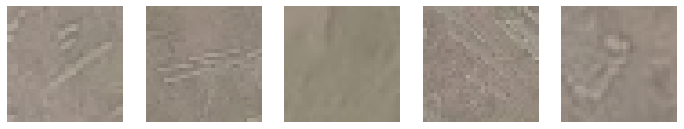

In [26]:
#Проверка модели
validimages, validlabels = next(iter(valid_loader))

fig, axes = plt.subplots(figsize=(12, 12), ncols=5)
print('training images')
for i in range(5):
    axe1 = axes[i] 
    imshow(validimages[i], ax=axe1)

outputs = model(validimages)
_, predicted = torch.max(outputs.data, 1)
print(validlabels[:5])
print(predicted[:5])

In [27]:
print(optimizer)
print(loss)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
tensor(0.2962, grad_fn=<NllLossBackward0>)


In [28]:
# test-the-model
model.eval()  # it-disables-dropout
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in valid_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

# Save 
torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model: 95.74285714285715 %


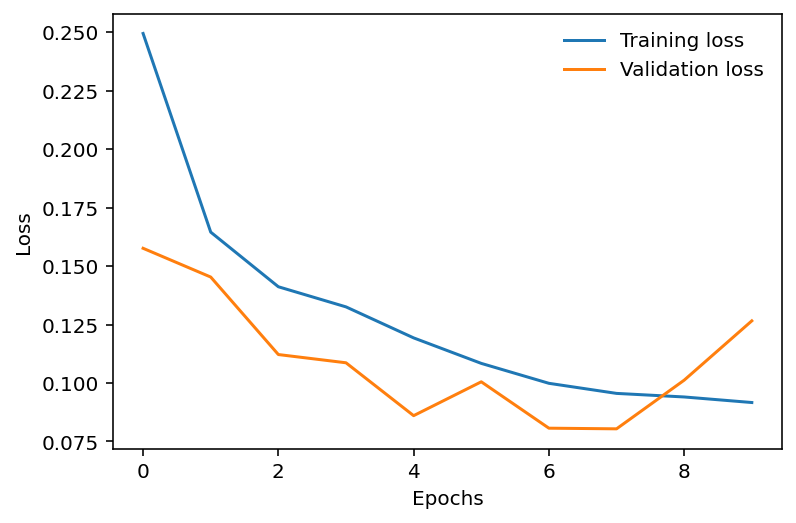

In [29]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)